In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41365 entries, 0 to 50364
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        41365 non-null  object 
 1   IDSTUD         41365 non-null  int64  
 2   ASBH02A        41365 non-null  object 
 3   ASBH02B        2694 non-null   float64
 4   ASBH03A        40775 non-null  object 
 5   ASBH04         40839 non-null  object 
 6   ASBH15A        36956 non-null  object 
 7   ASBH15B        34214 non-null  object 
 8   ASBH16         39885 non-null  object 
 9   ASBH17A        36143 non-null  object 
 10  ASBH17B        32069 non-null  object 
 11  ASBH18AA       39718 non-null  object 
 12  ASBH18AB       34791 non-null  object 
 13  ASBG01         40945 non-null  object 
 14  ASBG03         39866 non-null  object 
 15  ASDAGE         41360 non-null  float64
 16  ASBG10A        28638 non-null  float64
 17  ASBG10B        28451 non-null  float64
 18  ASBG10

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

In [4]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [6]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

pivot_table_test = df.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

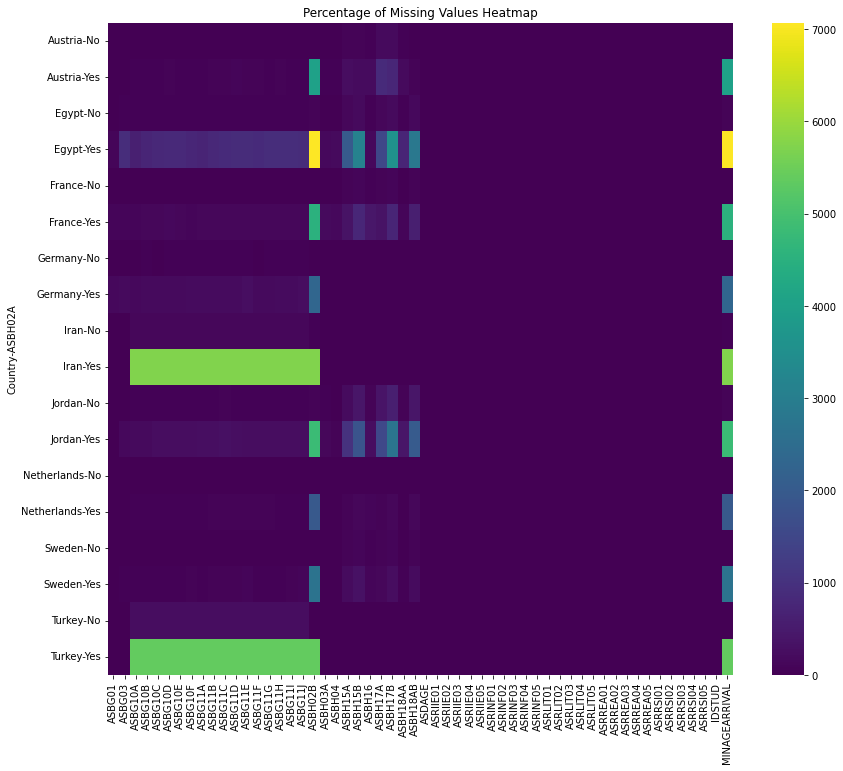

In [14]:
# Create the heatmap
plt.figure(figsize=(14,12 ))
sns.heatmap(pivot_table_test, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

Now let's created a pivot table to understand how country and immigrant status affect the number of missing values. 

In [7]:
print(pivot_table_test)

                     ASBG01  ASBG03  ASBG10A  ASBG10B  ASBG10C  ASBG10D  \
Country     ASBH02A                                                       
Austria     No            0       4        2        4        8        6   
            Yes           6      21       32       40       49       69   
Egypt       No            4      39       35       45       48       47   
            Yes          91     886      623      740      779      807   
France      No            6       7        6        9       10        8   
            Yes          90      96      110      128      119      139   
Germany     No           23      24       24       29       26       32   
            Yes         147     167      158      168      180      178   
Iran        No            0       0      120      120      120      120   
            Yes           0       0     5720     5720     5720     5720   
Jordan      No            2      21       31       40       47       55   
            Yes          

In [8]:
## column_order= ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [9]:
## pivot_table_test = pivot_table_test.reindex(column_order, axis=1)

ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE\<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATION\GUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATION\GUARDIAN B\
ASBH16	GEN\LVL OF EDUCATION\CHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN\<LANGUAGE OF TEST>\GUARDIAN A\
    
ASBH18AB	GEN\LANGUAGE SPOKEN\<LANGUAGE OF TEST>\GUARDIAN B\
    
ASBH18BA	GEN\LANGUAGE SPOKEN\<COUNTRY-SPECIFIC>\GUARDIAN A\
    
ASBH18BB	GEN\LANGUAGE SPOKEN\<COUNTRY-SPECIFIC>\GUARDIAN B\
    
ASBG01	GEN\SEX OF STUDENT\
ASBG03	GEN\OFTEN SPEAK <LANG OF TEST> AT HOME\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL\
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME"

There does not seem to be more gaps in the data for those who are not born in the countries where they have taken the test (ASBH02A == No). So that's good. 

In [10]:
# Calculate the total number of elements in each group
total_counts = df.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

Pivot Table with Percentage of Missing Values:
                         ASBG01     ASBG03     ASBG10A     ASBG10B     ASBG10C  \
Country     ASBH02A                                                             
Austria     No        0.000000   0.886918    0.443459    0.886918    1.773836   
            Yes       0.149068   0.521739    0.795031    0.993789    1.217391   
Egypt       No        1.413428  13.780919   12.367491   15.901060   16.961131   
            Yes       1.286947  12.530052    8.810635   10.465281   11.016829   
France      No        2.479339   2.892562    2.479339    3.719008    4.132231   
            Yes       1.988511   2.121078    2.430402    2.828104    2.629253   
Germany     No       11.616162  12.121212   12.121212   14.646465   13.131313   
            Yes       6.344411   7.207596    6.819163    7.250755    7.768666   
Iran        No        0.000000   0.000000  100.000000  100.000000  100.000000   
            Yes       0.000000   0.000000  100.000000  100.00

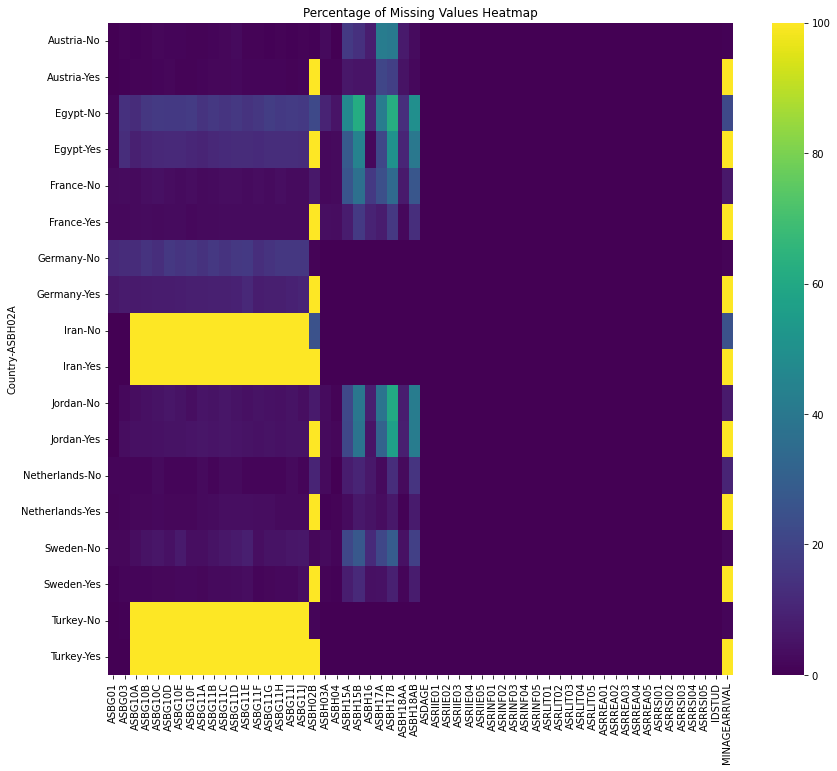

In [11]:
# Create the heatmap
plt.figure(figsize=(14,12 ))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

So **Iran** and **Turkey** have no experience data.

**Egypt**  and **Jordan** are missing quite a few demographic columns.

"ASBH16" is hopes for child's level of education - most parents seem to have answered this.

Germany, Iran and Turkey have not answered any questions on how often lang of test spoken at home (4) parents' level of edu 15,  professions 17, level of language 18. Iran and Turkey have also not answered sex of child G01 or how often child says lang spoken at home G03.

So this is helpful for our analysis. We can compare test scores for all countries. We can only compare feelings in school and experiences for certain countries - not Iran and Turkey. \ Likewise it is important to think about what to do with additional demographic data that goes further than whether the child was born in the country. Perhaps we should first focus on this one demographic variable and look at the others in a further analysis.

In [12]:
Iran = df[df['Country']=='Iran']

In [13]:
Iran.head()

,Country,IDSTUD,ASBH02A,ASBH02B,ASBH03A,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,ASDAGE,ASBG10A,ASBG10B,ASBG10C,ASBG10D,ASBG10E,ASBG10F,ASBG11A,ASBG11B,ASBG11C,ASBG11D,ASBG11E,ASBG11F,ASBG11G,ASBG11H,ASBG11I,ASBG11J,ASRREA01,ASRREA02,ASRREA03,ASRREA04,ASRREA05,ASRLIT01,ASRLIT02,ASRLIT03,ASRLIT04,ASRLIT05,ASRINF01,ASRINF02,ASRINF03,ASRINF04,ASRINF05,ASRIIE01,ASRIIE02,ASRIIE03,ASRIIE04,ASRIIE05,ASRRSI01,ASRRSI02,ASRRSI03,ASRRSI04,ASRRSI05,MINAGEARRIVAL
28767,Iran,50010101,Yes,NaN,1,1,4,3,6,3,1,1,1,2,1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.23274,438.42027,497.94700,460.63537,442.50136,479.40593,435.06482,453.06785,435.73060,464.67770,544.57670,416.69172,458.37841,459.24214,452.62385,420.36145,405.01032,399.89441,431.91898,397.83377,455.33956,423.40930,443.34869,466.84815,432.87704,NaN
28768,Iran,50010102,Yes,NaN,2,1,4,4,6,4,3,9,1,2,1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.51237,464.80405,477.11746,450.75631,471.98797,398.04629,431.73031,440.91092,506.09742,496.80002,446.17993,510.77146,443.13806,509.73825,477.54534,451.06695,452.90135,462.30566,480.02532,461.55398,424.88249,487.29252,465.58253,459.24594,445.98079,NaN
28769,Iran,50010104,Yes,NaN,1,1,5,4,6,9,1,1,1,2,1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547.43316,512.37982,501.54613,497.57228,520.53849,553.72993,496.35025,492.34504,479.89938,561.44170,543.14833,496.41628,503.17288,502.88685,548.16503,528.07276,500.36981,555.28775,501.58271,534.41304,508.46800,489.90223,529.41115,516.86575,542.61207,NaN
28770,Iran,50010105,Yes,NaN,1,1,4,4,6,7,9,1,1,2,1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.78396,534.15561,569.06000,527.51275,559.49177,551.24271,563.73372,521.25433,566.29943,573.74757,572.51114,495.14742,534.19099,542.25960,557.88514,519.05062,557.66392,511.88471,530.00587,570.79103,513.61474,564.99570,552.64224,525.50256,560.98589,NaN
28771,Iran,50010106,Yes,NaN,1,1,8,6,6,10,1,1,1,2,2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.74006,498.79452,590.48880,540.81669,500.63004,512.90488,464.45038,528.11644,536.29408,504.04485,543.10996,486.67904,526.25344,599.03437,545.76707,565.72912,554.70024,507.62716,555.80545,503.00891,567.74197,597.07128,527.51821,578.92902,542.78110,NaN
